In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Step 1: Define base and main URLs
base_url = "https://www.whatmobile.com.pk"
main_url = f"{base_url}/Samsung_Mobiles_Prices"

# Step 2: Get the main page
response = requests.get(main_url)
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Find all products
products = soup.find_all('div', class_='item')

# Step 4: Prepare list to store all product data
all_data = []

for product in products:
    name_tag = product.find('a', class_='BiggerText')
    if not name_tag:
        continue

    # Product name and price
    name = name_tag.text.strip()
    price_tag = product.find('span', class_='PriceFont')
    price = price_tag.text.strip() if price_tag else "N/A"

    # Product detail page link
    product_link = base_url + name_tag['href']

    # Fetch product detail page
    product_page = requests.get(product_link)
    detail_soup = BeautifulSoup(product_page.text, 'html.parser')

    # Find specification table (usually under <table class="specs">)
    specs_table = detail_soup.find('table', class_='specs')

    # Dictionary for storing specs of this phone
    specs = {'Name': name, 'Price': price, 'Product Link': product_link}

    # Extract all specs from table
    if specs_table:
        rows = specs_table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            if len(cols) == 2:
                feature = cols[0].text.strip()
                value = cols[1].text.strip()
                specs[feature] = value

    all_data.append(specs)

    print(f"Scraped: {name}")
    time.sleep(1)

# Step 5: Save to CSV
df = pd.DataFrame(all_data)
df.to_csv('samsung_all_features.csv', index=False, encoding='utf-8-sig')

print("CSV with all Samsung phone specifications created successfully!")
print(df.head())

Scraped: SamsungGalaxy Z Fold 6
Scraped: SamsungGalaxy S24 Ultra 512GB
Scraped: SamsungGalaxy S25 Ultra
Scraped: SamsungGalaxy S24 Ultra
Scraped: SamsungGalaxy Z Fold 5
Scraped: SamsungGalaxy Z Flip 6
Scraped: SamsungGalaxy Z Flip 5
Scraped: SamsungGalaxy S25
Scraped: SamsungGalaxy S24
Scraped: SamsungGalaxy S25 FE 512GB
Scraped: SamsungGalaxy S25 FE
Scraped: SamsungGalaxy S24 FE
Scraped: SamsungGalaxy S23 FE
Scraped: SamsungGalaxy A54
Scraped: SamsungGalaxy A55
Scraped: SamsungGalaxy A56
Scraped: SamsungGalaxy A35
Scraped: SamsungGalaxy A36
Scraped: SamsungGalaxy A34 256GB
Scraped: SamsungGalaxy A34
Scraped: SamsungGalaxy A25
Scraped: SamsungGalaxy A26
Scraped: SamsungGalaxy A24
Scraped: SamsungGalaxy A17 8GB
Scraped: SamsungGalaxy A13 128GB
Scraped: SamsungGalaxy A16 8GB
Scraped: SamsungGalaxy A15 256GB
Scraped: SamsungGalaxy A17
Scraped: SamsungGalaxy A16
Scraped: SamsungGalaxy A15
Scraped: SamsungGalaxy A14 6GB
Scraped: SamsungGalaxy A05s 6GB
Scraped: SamsungGalaxy A13
Scraped: Sam

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/samsung_all_features (1) (1) (1).csv")
df.head()


,Name,Price,Product Link,Build,SIM,Processor,Display,Memory,Camera,Connectivity,Features,Battery
0,SamsungGalaxy Z Fold 6,"604,999",https://www.whatmobile.com.pk/Samsung_Galaxy-Z...,14,2.0,8-core (1 x 3.39GHz Cortex-X4 + 3 x 3.1GHz Cor...,"Dynamic AMOLED 2X Capacitive Touchscreen, Mult...","512GB Built-in, 12GB RAM","Triple Camera: 50 MP, f/1.8, 23mm (wide), dual...","Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Accelerometer, Barometer, Compass, FingerPrint...","(Li-Po Non removable), 4400 mAh"
1,SamsungGalaxy S24 Ultra 512GB,"469,999",https://www.whatmobile.com.pk/Samsung_Galaxy-S...,14,2.0,Octa-core (1 x 3.39GHz Cortex-X4 + 3x3.1GHz Co...,"Dynamic LTPO AMOLED 2X Capacitive Touchscreen,...","512GB Built-in, 12GB RAM, UFS 4.0","Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3...","Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Accelerometer, Barometer, Compass, Fingerprint...",Li-ion 5000 mAh
2,SamsungGalaxy S25 Ultra,"439,999",https://www.whatmobile.com.pk/Samsung_Galaxy-S...,15,2.0,Octa-core (2 x 4.47 GHz Oryon V2 Phoenix L + 6...,Dynamic LTPO AMOLED 2X Capacitive Touchscreen,"512GB Built-in, 12GB RAM, UFS 4.0","Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3...","Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Accelerometer, Barometer, Compass, Fingerprint...",Li-ion 5000 mAh
3,SamsungGalaxy S24 Ultra,"434,999",https://www.whatmobile.com.pk/Samsung_Galaxy-S...,14,2.0,Octa-core (1 x 3.39GHz Cortex-X4 & 3x3.1GHz Co...,"Dynamic LTPO AMOLED 2X Capacitive Touchscreen,...","256GB Built-in, 12GB RAM, UFS 4.0","Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3...","Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Accelerometer, Barometer, Compass, Fingerprint...","(Li-ion Non removable), 5000 mAh"
4,SamsungGalaxy Z Fold 5,"399,999",https://www.whatmobile.com.pk/Samsung_Galaxy-Z...,13,2.0,Octa-core (1 x 3.36 GHz Cortex-X3 & 2x2.8 GHz ...,Foldable Dynamic AMOLED 2X Capacitive Touchscr...,"256/512GB, 1TB Built-in, 12GB RAM, UFS 4.0","Triple Camera: 50 MP, f/1.8, 23mm (wide), Dual...","Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Accelerometer, Compass, Fingerprint (side-moun...","(Li-Po Non removable), 4400 mAh"


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          128 non-null    object 
 1   Price         128 non-null    object 
 2   Product Link  128 non-null    object 
 3   Build         122 non-null    object 
 4   SIM           122 non-null    float64
 5   Processor     122 non-null    object 
 6   Display       122 non-null    object 
 7   Memory        122 non-null    object 
 8   Camera        122 non-null    object 
 9   Connectivity  122 non-null    object 
 10  Features      122 non-null    object 
 11  Battery       122 non-null    object 
dtypes: float64(1), object(11)
memory usage: 12.1+ KB
None


In [6]:
df.describe()

,SIM
count,122.000000
mean,1.934426
std,0.248556
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [7]:
df.isnull().sum()

,0
Name,0
Price,0
Product Link,0
Build,6
SIM,6
Processor,6
Display,6
Memory,6
Camera,6
Connectivity,6


In [8]:
print(df.duplicated().sum())

0


In [9]:
# Clean 'Build' column – extract only numeric values
df['Build'] = (df['Build'].astype(str).str.extract(r'(\d+)', expand=False).astype('Int64'))


In [10]:
# Keep only numbers in Price column
df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9]', '', regex=True)
# Convert to numeric (ignore empty values)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [11]:
df['SIM'] = (df['SIM'].astype(str).str.extract(r'(\d+)', expand=False).astype('Int64'))


In [12]:
df['Camera'].head(10)


,Camera
0,"Triple Camera: 50 MP, f/1.8, 23mm (wide), dual..."
1,"Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3..."
2,"Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3..."
3,"Quad Camera: 200 MP, f/1.7, 24mm (wide), 1/1.3..."
4,"Triple Camera: 50 MP, f/1.8, 23mm (wide), Dual..."
5,"Dual Camera: 50 MP, f/1.8, 23mm (wide), dual p..."
6,"Dual Camera: 12 MP, f/1.8, 24mm (wide), 1/1.76..."
7,"Triple Camera: 50 MP, f/1.8, 24mm (wide), 1/1...."
8,"Triple Camera: 50 MP, f/1.8, 24mm (wide), 1/1...."
9,"Triple Camera: 50 MP, f/1.8, 24mm (wide), 1/1...."


In [13]:
df['Camera'] = (
    df['Camera']
    .astype(str)
    .str.extract(r'(\d+)\s*[mM][pP]', expand=False)  # matches "mp", "MP", etc.
    .astype('Int64')
)


In [14]:
import re
def extract_core_count(text):
    text = str(text).lower()
    # Match numeric (e.g., 8-core, 12-core)
    match = re.search(r'(\d+)\s*[- ]*core', text)
    if match:
        return int(match.group(1))
    # Match text forms (e.g., octa-core, hexa-core)
    elif 'octa' in text:
        return 8
    elif 'hexa' in text:
        return 6
    elif 'quad' in text:
        return 4
    elif 'penta' in text:
        return 5
    elif 'deca' in text:
        return 10
    else:
        return 0

df['Processor'] = df['Processor'].apply(extract_core_count)

In [15]:
df['Battery'] = (df['Battery'].astype(str).str.extract(r'(\d+)', expand=False).astype('Int64'))


In [16]:
import numpy as np
# Storage
df['Storage'] = df['Memory'].astype(str).str.extract(r'(\d+)').astype('Int64')

# RAM
df['RAM'] = df['Memory'].astype(str).str.extract(r'(\d+)\s*GB\s*RAM')[0].astype('Int64')



In [17]:
df.drop(['Memory'], axis=1, inplace=True)


In [18]:
# Clean Display column – keep Dynamic/LTPO/Foldable etc. correctly
df['Display'] = (
    df['Display']
    .astype(str)
    .str.extract(r'(Foldable|Dynamic\s*AMOLED|LTPO\s*AMOLED|Super\s*AMOLED|AMOLED|TFT|IPS)', expand=False)
    .fillna('Other')
    .str.title()
)


In [19]:
df.drop(columns=['Product Link'], inplace=True)

In [20]:
import re

# normalize
df['Connectivity'] = df['Connectivity'].astype(str).str.lower()

def get_wifi_version_num(s):
    s = str(s)
    versions = set()

    # look for explicit tokens: 6e, 7, 6, 5
    if re.search(r'\b6e\b', s): versions.add(6)
    if re.search(r'\b7\b', s): versions.add(7)
    if re.search(r'\b6\b', s): versions.add(6)
    if re.search(r'\b5\b', s): versions.add(5)

    # catch common shorthand (ac -> Wi-Fi 5, ax -> Wi-Fi 6)
    if 'ac' in s and 5 not in versions:
        versions.add(5)
    if 'ax' in s and 6 not in versions:
        versions.add(6)

    # if we found any version tokens, return the highest (most capable)
    if versions:
        return max(versions)

    # if the text mentions "wi-fi" but no version tokens, return 1 (generic Wi-Fi)
    if 'wi-fi' in s:
        return 1

    # no Wi-Fi at all
    return 0

# apply to dataframe
df['WiFi_Version'] = df['Connectivity'].apply(get_wifi_version_num)

In [21]:
#Create Yes/No columns for each feature
df['Dual_Band'] = df['Connectivity'].apply(lambda x: 'Yes' if 'dual-band' in x else 'No')
df['Tri_Band'] = df['Connectivity'].apply(lambda x: 'Yes' if 'tri-band' in x else 'No')
df['Hotspot'] = df['Connectivity'].apply(lambda x: 'Yes' if 'hotspot' in x else 'No')
df['WiFi_Direct'] = df['Connectivity'].apply(lambda x: 'Yes' if 'wi-fi direct' in x else 'No')

In [22]:
# Convert all text to lowercase for easy matching
df['Features'] = df['Features'].astype(str).str.lower()

# Create Yes/No columns for each feature
df['Accelerometer'] = df['Features'].apply(lambda x: 'Yes' if 'accelerometer' in x else 'No')
df['Compass'] = df['Features'].apply(lambda x: 'Yes' if 'compass' in x else 'No')
df['Fingerprint'] = df['Features'].apply(lambda x: 'Yes' if 'fingerprint' in x else 'No')
df['Barometer'] = df['Features'].apply(lambda x: 'Yes' if 'barometer' in x else 'No')
df['HeartRate'] = df['Features'].apply(lambda x: 'Yes' if 'heartrate' in x else 'No')



In [23]:
df.drop(columns=['Connectivity'], inplace=True)
df.drop(columns=['Features'], inplace=True)

In [24]:
df

,Name,Price,Build,SIM,Processor,Display,Camera,Battery,Storage,RAM,WiFi_Version,Dual_Band,Tri_Band,Hotspot,WiFi_Direct,Accelerometer,Compass,Fingerprint,Barometer,HeartRate
0,SamsungGalaxy Z Fold 6,604999.0,14,2,8,Dynamic Amoled,50,4400,512,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
1,SamsungGalaxy S24 Ultra 512GB,469999.0,14,2,8,Ltpo Amoled,200,5000,512,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
2,SamsungGalaxy S25 Ultra,439999.0,15,2,8,Ltpo Amoled,200,5000,512,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
3,SamsungGalaxy S24 Ultra,434999.0,14,2,8,Ltpo Amoled,200,5000,256,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
4,SamsungGalaxy Z Fold 5,399999.0,13,2,8,Foldable,50,4400,256,12,7,No,Yes,No,Yes,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,SamsungGalaxy S26 Edge,239999.0,15,2,8,Ltpo Amoled,200,4000,256,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
124,SamsungGalaxy S26 Pro,359999.0,15,2,8,Ltpo Amoled,50,5000,256,12,7,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
125,SamsungGalaxy Z Flip 7 FE,NaN,16,2,10,Foldable,50,4000,128,8,6,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No
126,SamsungGalaxy G Fold,654999.0,15,2,8,Foldable,50,5700,512,16,6,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No


In [25]:
df.to_csv('Samsung Mobile Price Dataset.csv', index=False)


In [27]:
print(df.isnull().sum())

Name              0
Price            22
Build             6
SIM               6
Processor         0
Display           0
Camera            6
Battery           6
Storage           6
RAM               6
WiFi_Version      0
Dual_Band         0
Tri_Band          0
Hotspot           0
WiFi_Direct       0
Accelerometer     0
Compass           0
Fingerprint       0
Barometer         0
HeartRate         0
dtype: int64


In [28]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())  # better than mean
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [29]:
# Check again if any null values remain
print(df.isnull().sum())


Name             0
Price            0
Build            0
SIM              0
Processor        0
Display          0
Camera           0
Battery          0
Storage          0
RAM              0
WiFi_Version     0
Dual_Band        0
Tri_Band         0
Hotspot          0
WiFi_Direct      0
Accelerometer    0
Compass          0
Fingerprint      0
Barometer        0
HeartRate        0
dtype: int64


In [30]:
print("\nFinal dataset shape:", df.shape)


Final dataset shape: (128, 20)


In [31]:
df.describe()

,Price,Build,SIM,Processor,Camera,Battery,Storage,RAM,WiFi_Version
count,128.000000,128.0,128.0,128.000000,128.0,128.0,128.0,128.0,128.000000
mean,137567.000000,11.914062,1.9375,7.625000,48.1875,4674.0625,177.375,7.375,4.781250
std,147441.822188,2.000108,0.243013,1.822864,37.819037,524.038584,123.201838,3.182135,1.869513
min,15999.000000,8.0,1.0,0.000000,8.0,3000.0,16.0,2.0,0.000000
25%,41199.000000,10.0,2.0,8.000000,13.0,4400.0,128.0,4.0,5.000000
50%,74499.000000,12.0,2.0,8.000000,50.0,5000.0,128.0,8.0,5.000000
75%,173874.000000,14.0,2.0,8.000000,50.0,5000.0,256.0,8.0,6.000000
max,654999.000000,16.0,2.0,10.000000,200.0,5700.0,512.0,16.0,7.000000


In [32]:
df.dtypes

,0
Name,object
Price,float64
Build,Int64
SIM,Int64
Processor,int64
Display,object
Camera,Int64
Battery,Int64
Storage,Int64
RAM,Int64


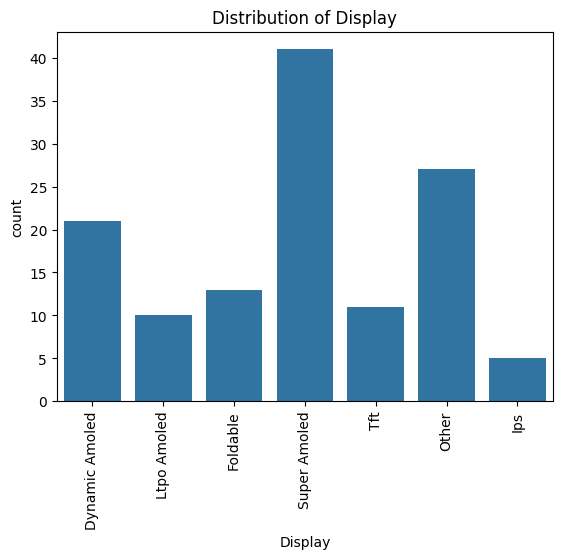

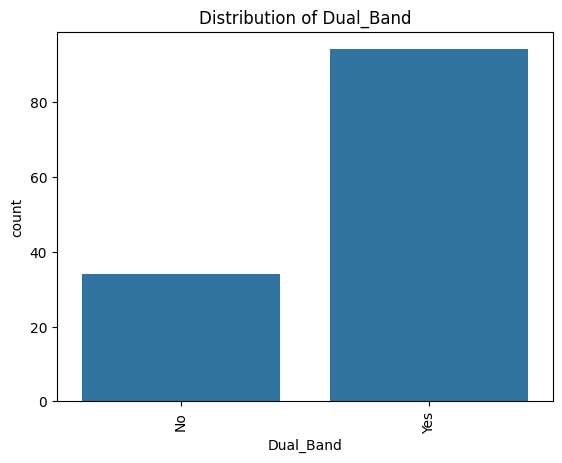

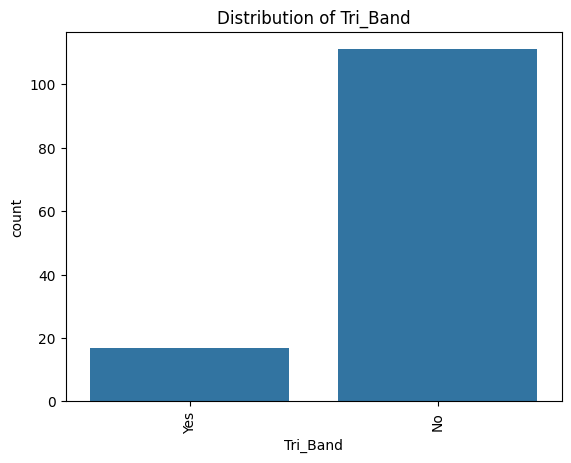

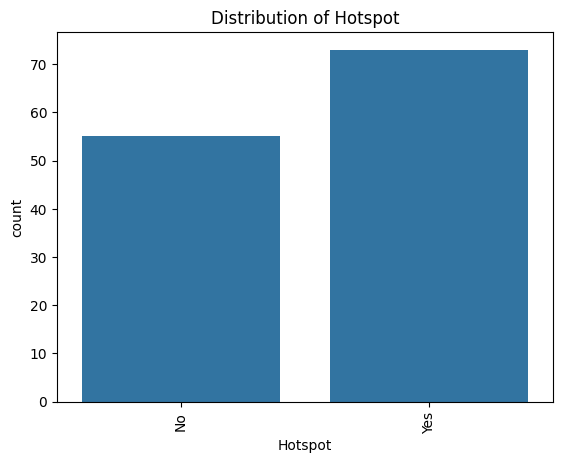

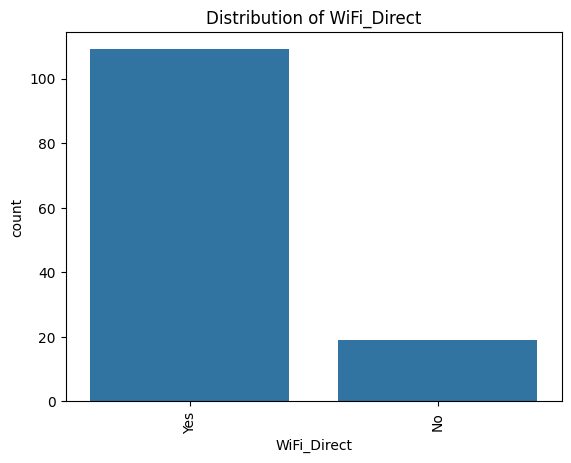

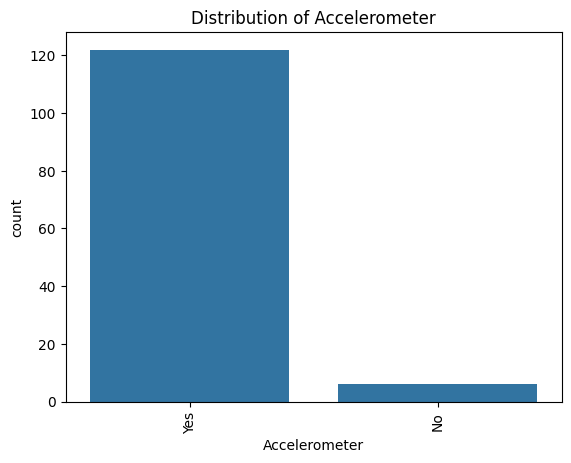

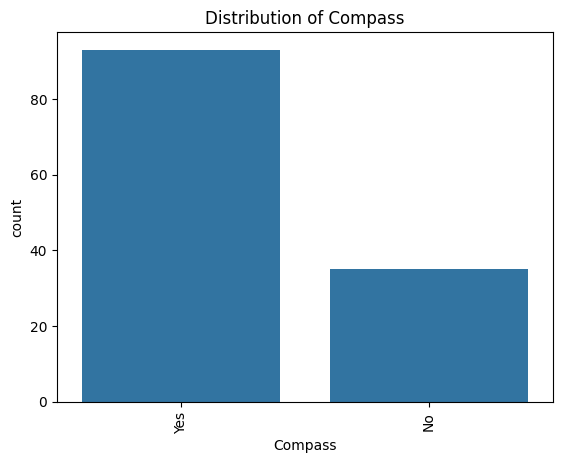

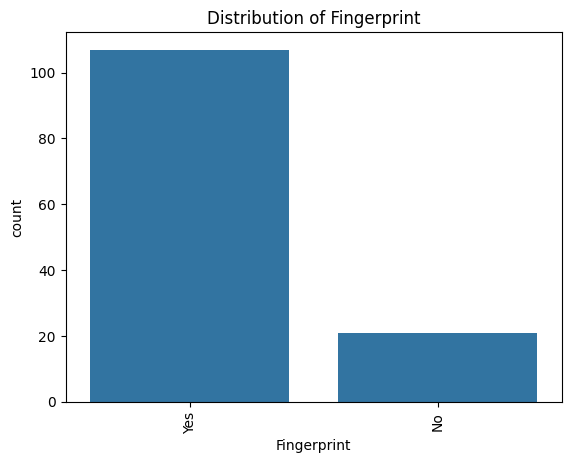

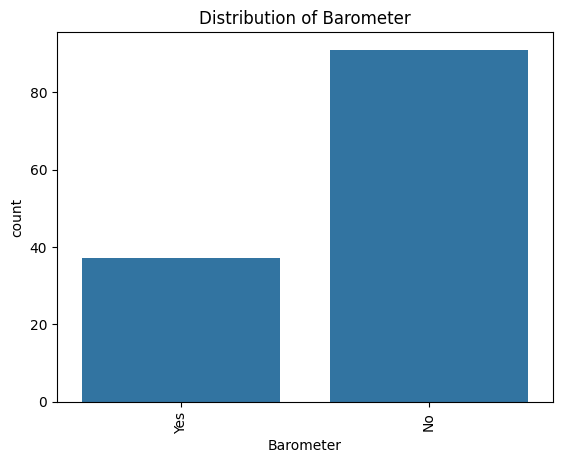

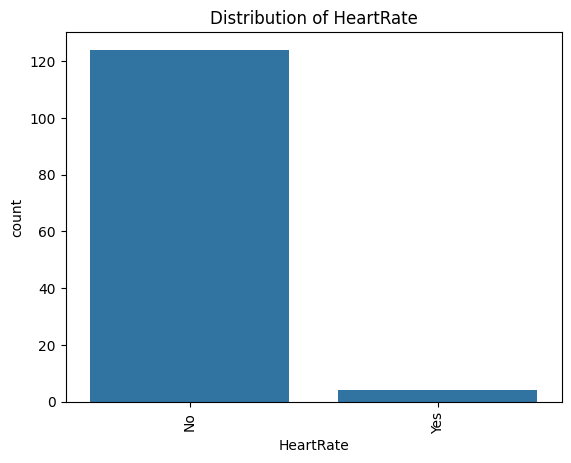

In [33]:
#bar plot for categorical columns
import seaborn as sns
import matplotlib.pyplot as plt
cat_cols = df.select_dtypes(include=['object']).columns.drop('Name', errors='ignore')
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

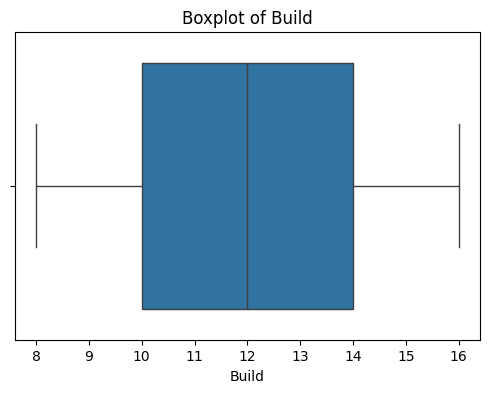

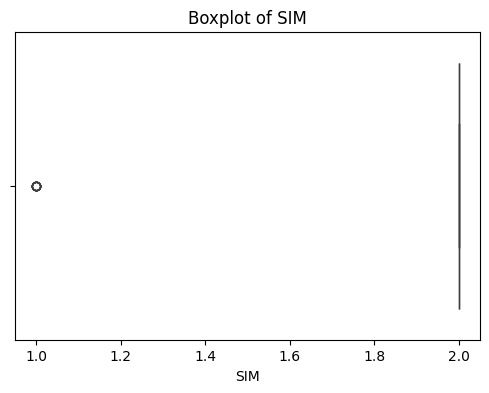

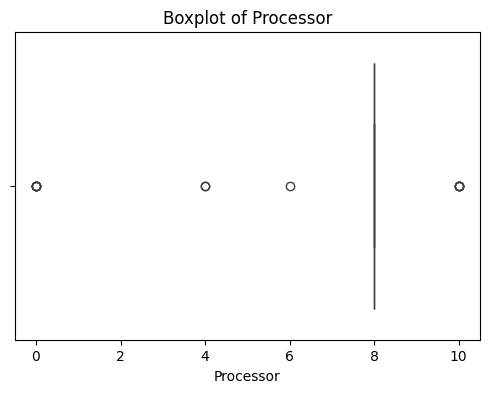

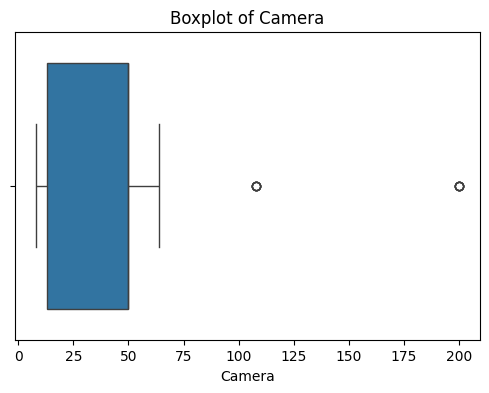

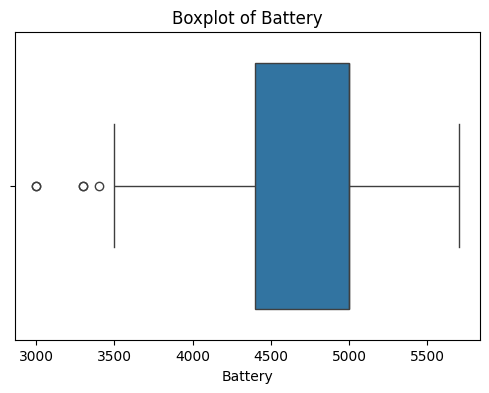

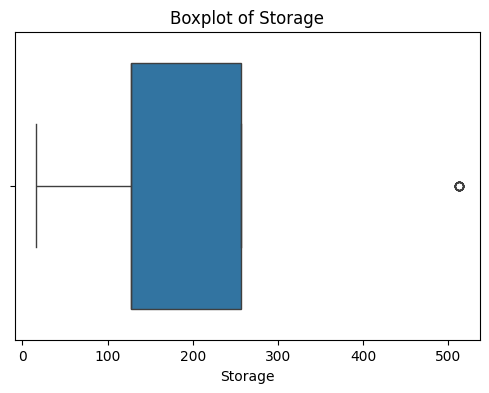

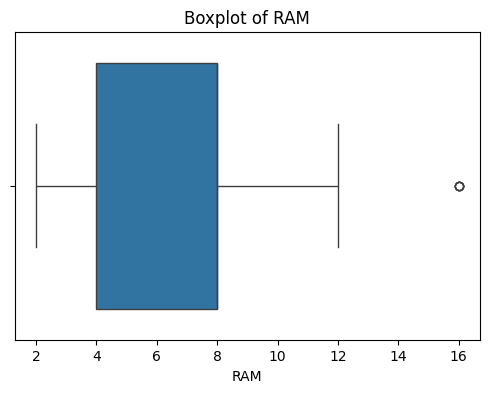

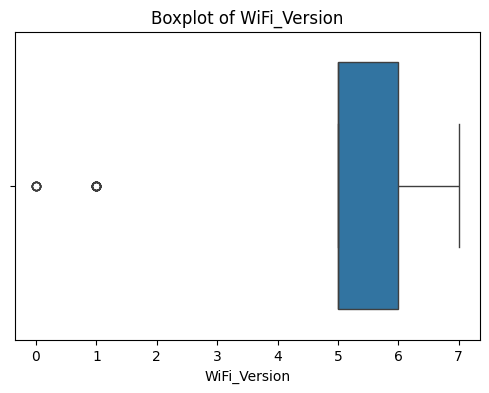

In [34]:
#boxplot for check outliers
for col in df.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

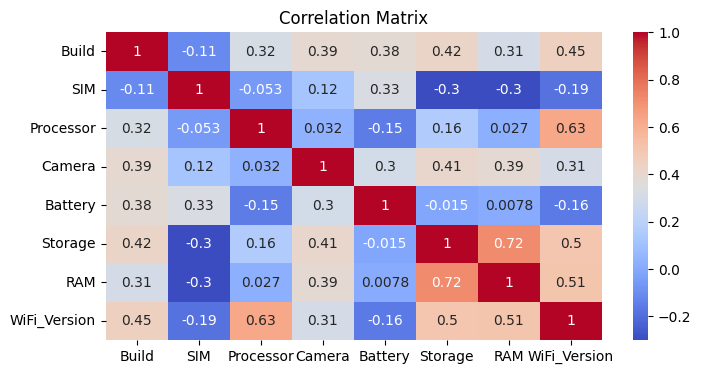

In [35]:
#correlation
numeric_cols = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(8,4))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create encoder
le = LabelEncoder()

# Select only categorical columns, but exclude 'Name'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != 'Name']

# Apply label encoding to selected categorical columns only
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


      Price  Build  SIM  Processor  Display  Camera  Battery  Storage  RAM  \
0  604999.0     14    2          8        0      50     4400      512   12   
1  469999.0     14    2          8        3     200     5000      512   12   
2  439999.0     15    2          8        3     200     5000      512   12   
3  434999.0     14    2          8        3     200     5000      256   12   
4  399999.0     13    2          8        1      50     4400      256   12   

   WiFi_Version  Dual_Band  Tri_Band  Hotspot  WiFi_Direct  Accelerometer  \
0             7          0         1        0            1              1   
1             7          0         1        0            1              1   
2             7          0         1        0            1              1   
3             7          0         1        0            1              1   
4             7          0         1        0            1              1   

   Compass  Fingerprint  Barometer  HeartRate  
0        1          

In [41]:
# Drop the columns you don't want to use as features
df = df.drop(columns=['Name'], errors='ignore')

# Define features (X) and target (y)
x = df.drop(columns=['Price'])
y = df['Price']


In [42]:
x.shape

(128, 18)

In [43]:
y.shape

(128,)

In [45]:
x_train.shape

(102, 18)

In [46]:
y_train.shape

(102,)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
predictions = model.predict(x_test)
predictions

array([117070.66704364,   4564.91126186,  42030.87300512,  60625.24841909,
        34023.27670137, 104025.32531705, 282655.68716601, 206201.80759537,
        41486.63704367,  96310.32013605,  37142.74185902,  78849.26207176,
       212502.98735973, 294708.0362144 ,  64842.4183    ,  74498.99999999,
       122046.16955797,  37518.96644086, 245899.97037638, -59101.04020053,
        65781.77162218, 195056.89407457, 197483.86741007, 163224.41900605,
       108655.80864669,  23399.92252277])

In [49]:
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

Linear Regression Results:
R2 Score: 0.36542730335957374
MAE: 50625.39200960725
MSE: 4628555066.558058


In [50]:
from sklearn.ensemble import RandomForestRegressor
# Create and train model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test)

# Evaluate
print("\n Random Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))



 Random Forest Results:
R2 Score: 0.4334931072990015
MAE: 36415.779743589745
MSE: 4132085042.948291


Degree 1 MSE: 32.95163067758561
R^2 Score (Test): 0.8988436087355123
Degree 2 MSE: 15.896015182051997
R^2 Score (Test): 0.9512017008494917


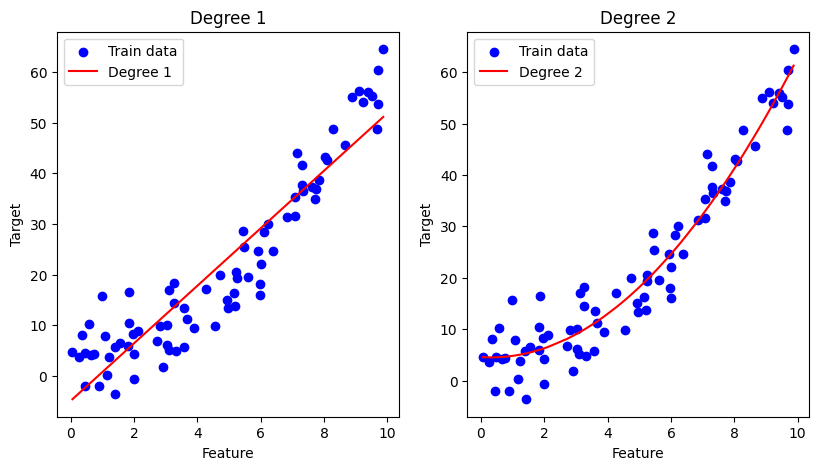

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create synthetic nonlinear data
np.random.seed(42)
X_poly = np.random.rand(100, 1) * 10
y_poly = 0.5 * X_poly.squeeze()**2 + X_poly.squeeze() + 2 + np.random.randn(100) * 5  # Quadratic with noise

# Split data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Sort for plotting
sort_idx = np.argsort(X_train_poly.squeeze())
X_sorted = X_train_poly[sort_idx]
y_sorted = y_train_poly[sort_idx]

# Compare degrees 1, 2
degrees = [1, 2]
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_poly.fit(X_train_poly, y_train_poly)

    y_pred_poly = model_poly.predict(X_test_poly)
    error_poly = mean_squared_error(y_test_poly, y_pred_poly)
    print(f"Degree {degree} MSE: {error_poly}")
    print("R^2 Score (Test):", r2_score(y_test_poly, y_pred_poly))

    plt.subplot(1, 3, i)
    plt.scatter(X_train_poly, y_train_poly, color='blue', label='Train data')
    plt.plot(X_sorted, model_poly.predict(X_sorted.reshape(-1, 1)), color='red', label=f'Degree {degree}')
    plt.title(f'Degree {degree}')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()

plt.show()

In [57]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_poly, x_train, y_train, scoring='r2', cv=5)
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [-0.55455383 -1.10732526 -9.32457648  0.63975947 -1.62225635]
Average R²: -2.3937904892379396


In [58]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

model_poly_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=10))  # try alpha=0.1, 1, 10, 100
])

scores = cross_val_score(model_poly_ridge, x_train, y_train, scoring='r2', cv=5)
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [0.78981979 0.74252615 0.75545273 0.85849281 0.83246656]
Average R²: 0.7957516064127631


In [59]:
import joblib
# Save model
joblib.dump(model, 'best_poly_model.pkl')


['best_poly_model.pkl']

In [60]:
from google.colab import files
files.download('best_poly_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>